<a href="https://colab.research.google.com/github/swathypk93/swathypk93/blob/main/yulu_hypothesis_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
df = pd.read_csv("bike_sharing.csv")


Saving bike_sharing.csv to bike_sharing.csv


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind, f_oneway, chi2_contingency, shapiro, levene
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv("bike_sharing.csv")
df.shape, df.info(), df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


((10886, 12),
 None,
              season       holiday    workingday       weather         temp  \
 count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
 mean       2.506614      0.028569      0.680875      1.418427     20.23086   
 std        1.116174      0.166599      0.466159      0.633839      7.79159   
 min        1.000000      0.000000      0.000000      1.000000      0.82000   
 25%        2.000000      0.000000      0.000000      1.000000     13.94000   
 50%        3.000000      0.000000      1.000000      1.000000     20.50000   
 75%        4.000000      0.000000      1.000000      2.000000     26.24000   
 max        4.000000      1.000000      1.000000      4.000000     41.00000   
 
               atemp      humidity     windspeed        casual    registered  \
 count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
 mean      23.655084     61.886460     12.799395     36.021955    155.552177   
 std        8.474601     1

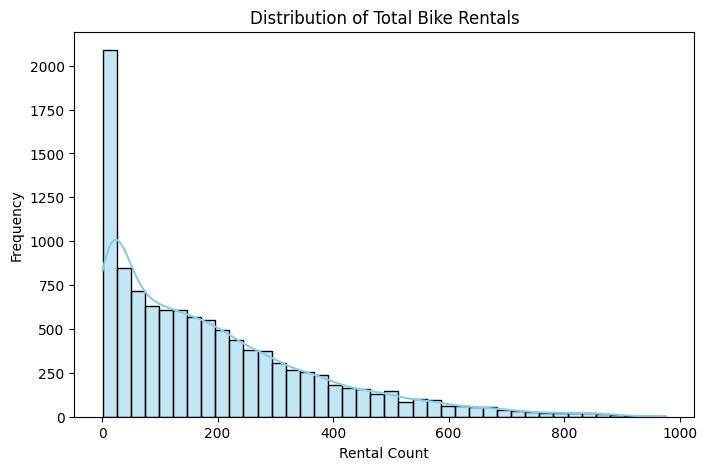

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['count'], bins=40, kde=True, color='skyblue')
plt.title('Distribution of Total Bike Rentals')
plt.xlabel('Rental Count')
plt.ylabel('Frequency')
plt.show()


Insights

Right-Skewed Rentals:
Most days have low to moderate rentals, while a few days show very high usage, creating a right-skewed distribution.

Frequent Low Rental Days:
Many days record fewer than 100 rentals, suggesting underutilization and irregular customer engagement.

Peak at Very Low Rentals:
A sharp spike in rentals between 0–50 may be due to poor weather, holidays, or low visibility.

Rare High Usage Spikes:
Some days exceed 700 rentals, likely influenced by good weather, weekday commutes, or local events.

Volatile Usage Patterns:
Rental counts vary from 1 to 977, showing high volatility and unpredictable customer behavior.

Demand Mostly Below Mean:
With the mean around 192 and the median at 145, most days fall below average rental levels.

High-Demand Day Insights:
Days with peak rentals can reveal success factors like favorable weather, weekdays, or special events.

Underutilization Risk:
Regular low-demand days may cause inefficient use of fleet and infrastructure, impacting profits.

Recommendations:


Promote Off-Peak Rides:
Offer discounts and campaigns on weekends or holidays to increase usage on low-demand days.

Adopt Dynamic Pricing:
Apply variable pricing — lower during off-peak times, higher during busy periods — to balance demand.

Increase User Engagement:
Use push alerts, reminders, and gamified app features to boost rentals among casual users.

Study Peak Patterns:
Analyze weather, weekday, and event data from high-demand days to guide future strategies.

Plan for High Demand:
Ensure enough bikes and charged batteries are available on days likely to see rental surges.

Forecast with Data Models:
Build predictive models using weather, day of the week, and season to estimate daily rentals.

Reallocate Bikes Smartly:
Move bikes between zones based on expected demand using historical and real-time usage data.

Convert Users to Regulars:
Offer rewards, referrals, and subscription deals to turn occasional riders into frequent users.



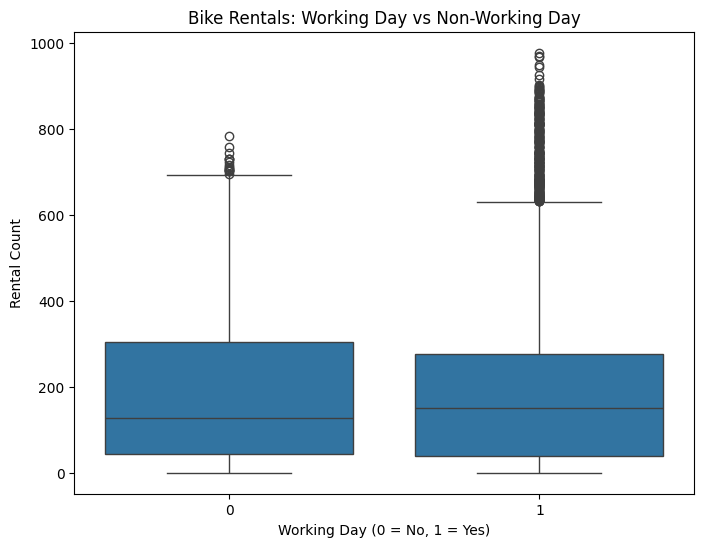

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='workingday', y='count', data=df)
plt.title('Bike Rentals: Working Day vs Non-Working Day')
plt.xlabel('Working Day (0 = No, 1 = Yes)')
plt.ylabel('Rental Count')
plt.show()


Insights :
Similar Median Rentals:
Working and non-working days have similar median rentals, indicating consistent demand regardless of the day type.

More Outliers on Working Days:
Working days show frequent rental spikes, likely due to commuter traffic and favorable conditions.

Higher Variability on Non-Working Days:
Rental counts on non-working days vary more, suggesting inconsistent leisure or weather-related usage.

Low Rentals on Both Days:
Both day types include many low-rental days, highlighting external factors like weather or awareness.


Recommendations :

Boost Weekend Engagement:
Offer leisure-focused promotions on weekends to stabilize usage and attract more casual riders.

Prepare for Weekday Surges:
Ensure fleet readiness in high-demand weekday zones using historical patterns.

Analyze Peak Usage Days:
Identify factors behind weekday rental spikes to replicate successful conditions.

Use Smart Fleet Allocation:
Reallocate bikes daily based on demand forecasts to reduce idle inventory.

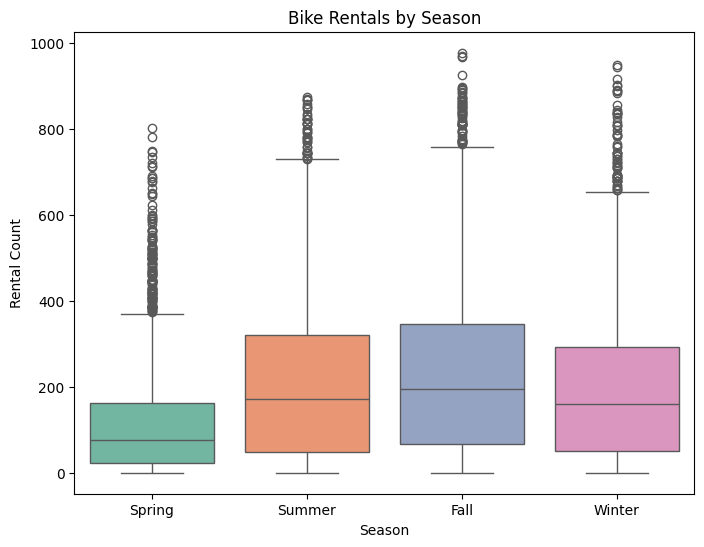

In [ ]:
season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df['season_name'] = df['season'].map(season_labels)

plt.figure(figsize=(8, 6))
sns.boxplot(x='season_name', y='count', data=df, palette='Set2')
plt.title('Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Rental Count')
plt.show()


Insights
Spring: Lowest rentals, likely due to cooler, unpredictable weather conditions.

Summer: Rentals increase; good weather encourages higher bike usage.

Fall: Highest median rentals; consistent demand during comfortable weather.

Winter: Moderate rentals despite cold, possibly due to routine commuters.

Recommendations
Spring: Run awareness campaigns to boost early-season user interest.

Summer: Maximize availability; promote leisure rides and tourism usage.

Fall: Study peak patterns to maintain strong seasonal performance.

Winter: Offer loyalty rewards to retain regular cold-weather riders.



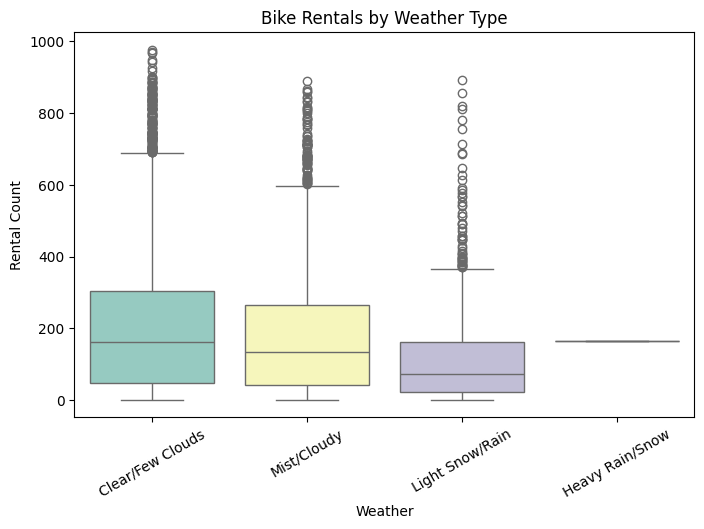

In [ ]:
weather_labels = {
    1: 'Clear/Few Clouds',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow'
}
df['weather_desc'] = df['weather'].map(weather_labels)

plt.figure(figsize=(8, 5))
sns.boxplot(x='weather_desc', y='count', data=df, palette='Set3')
plt.title('Bike Rentals by Weather Type')
plt.xlabel('Weather')
plt.ylabel('Rental Count')
plt.xticks(rotation=30)
plt.show()


Insights :

Clear/Few Clouds: Highest rentals occur during clear and pleasant weather.

Mist/Cloudy: Slightly lower rentals, though still moderately strong usage.

Light Snow/Rain: Rentals drop significantly under light precipitation conditions.

Heavy Rain/Snow: Very few or no rentals during extreme weather.

Recommendations:

Clear/Few Clouds: Promote rides with offers on clear weather days.

Mist/Cloudy: Maintain normal operations; consider light engagement campaigns.

Light Snow/Rain: Alert users and offer indoor activity alternatives.

Heavy Rain/Snow: Suspend or limit services; prioritize safety messaging.














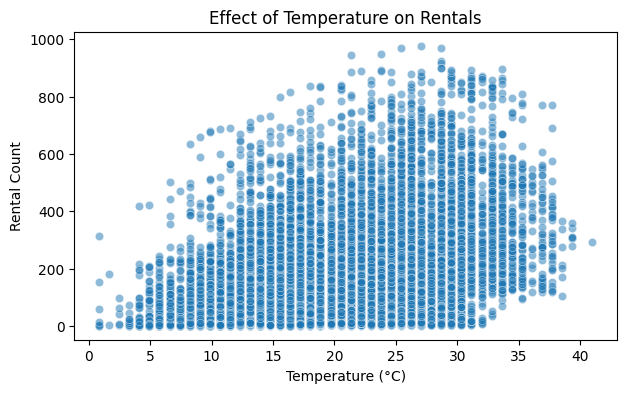

In [ ]:
plt.figure(figsize=(7, 4))
sns.scatterplot(x='temp', y='count', data=df, alpha=0.5)
plt.title('Effect of Temperature on Rentals')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rental Count')
plt.show()


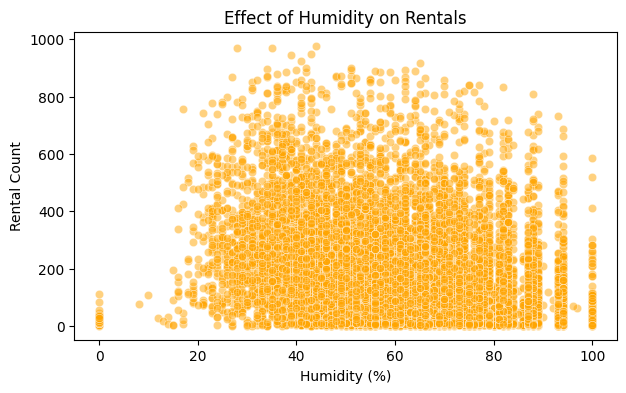

In [ ]:
plt.figure(figsize=(7, 4))
sns.scatterplot(x='humidity', y='count', data=df, alpha=0.5, color='orange')
plt.title('Effect of Humidity on Rentals')
plt.xlabel('Humidity (%)')
plt.ylabel('Rental Count')
plt.show()


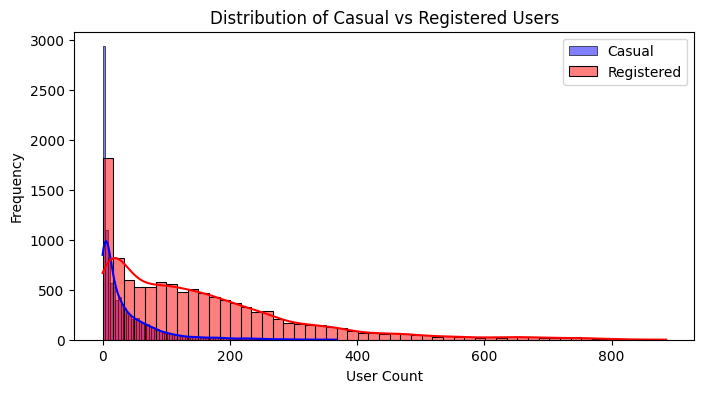

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df['casual'], color='blue', label='Casual', kde=True)
sns.histplot(df['registered'], color='red', label='Registered', kde=True)
plt.legend()
plt.title('Distribution of Casual vs Registered Users')
plt.xlabel('User Count')
plt.ylabel('Frequency')
plt.show()


In [ ]:
print(df.isnull().sum())
print("Duplicate Rows:", df.duplicated().sum())


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64
Duplicate Rows: 0


In [ ]:

categorical_cols = ['season', 'holiday', 'workingday', 'weather']
for col in categorical_cols:
    df[col] = df[col].astype('category')


df['season_name'] = df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
df['weather_desc'] = df['weather'].map({
    1: 'Clear/Few Clouds',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow'
})


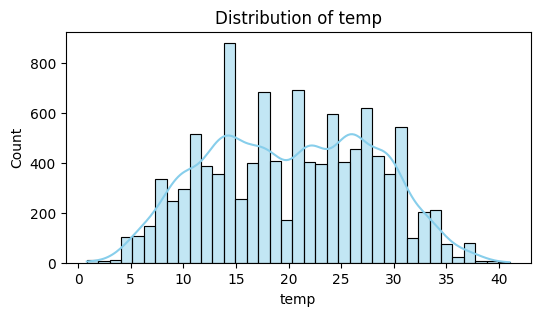

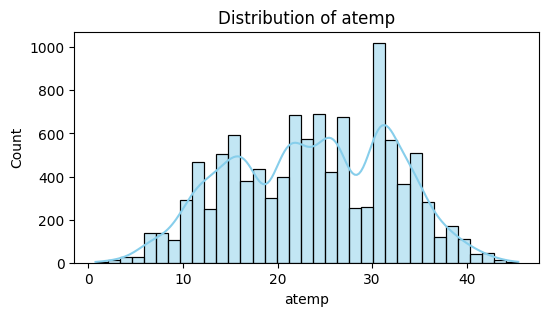

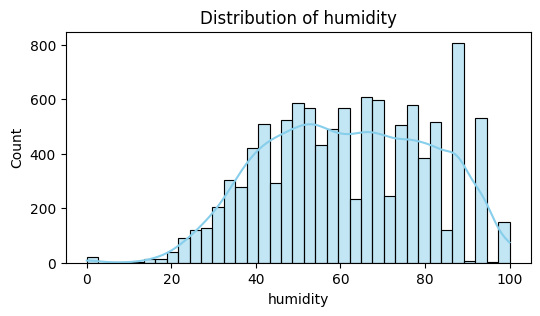

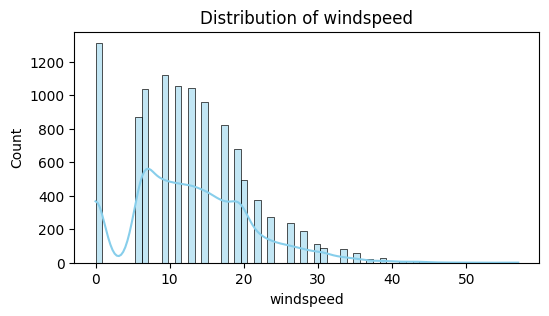

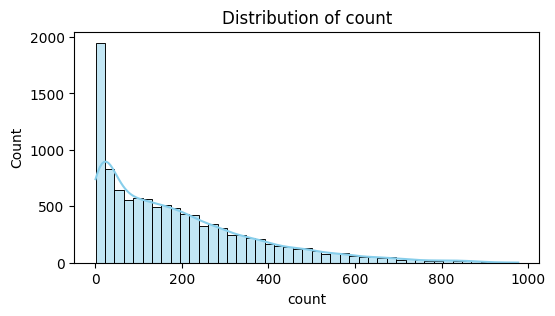

In [ ]:
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'count']

for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.show()


Insights

Most rentals occur when windspeed is below 10 km/h.

Windspeed distribution is right-skewed with a long tail.

Sharp spike at 0 windspeed suggests possible data issue.

Rentals drop significantly as windspeed exceeds 25 km/h.

Recommendations

Check if 0 windspeed means missing or faulty data.

Limit bike usage during very high wind conditions.

Send alerts encouraging rides during calm wind hours.

Use windy days for bike maintenance and redistribution.

Include windspeed as a variable in demand models.

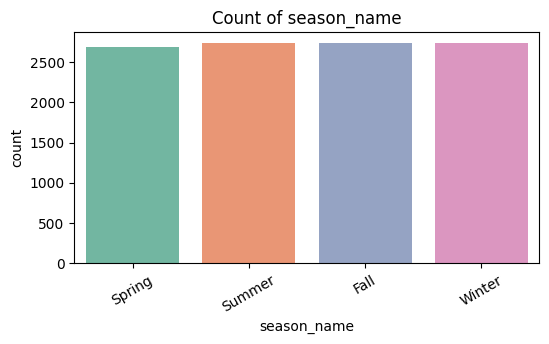

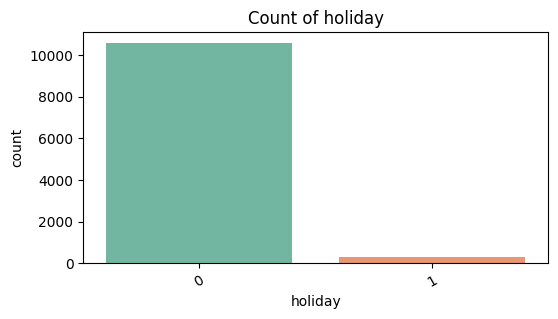

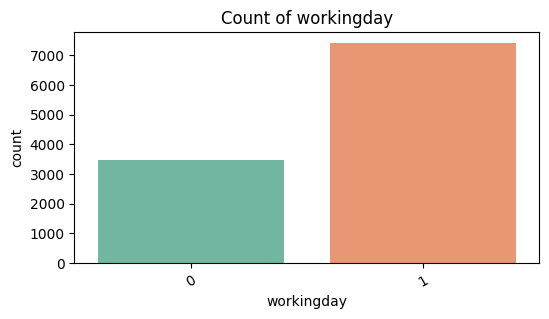

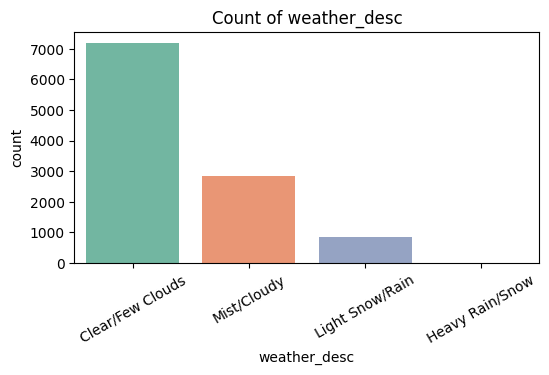

In [ ]:
cat_cols = ['season_name', 'holiday', 'workingday', 'weather_desc']

for col in cat_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=col, data=df, palette='Set2')
    plt.xticks(rotation=30)
    plt.title(f'Count of {col}')
    plt.show()


Insights

Clear weather days are the most frequent.

Misty/cloudy days are significantly fewer than clear ones.

Light snow/rain days occur rarely.

Heavy rain/snow days are extremely rare.

Recommendations

Focus marketing on clear weather days.

Ensure basic operations run during misty/cloudy days.

Suspend or limit rides in extreme weather.

Plan maintenance during rare heavy weather days.

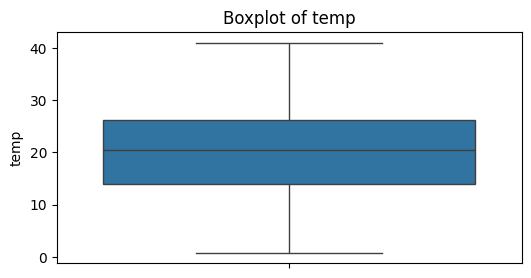

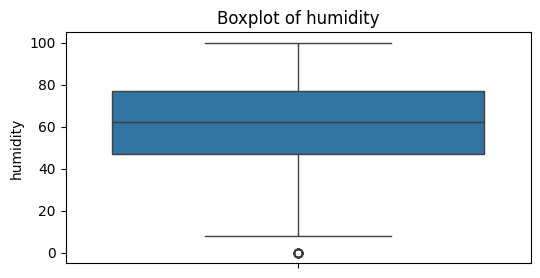

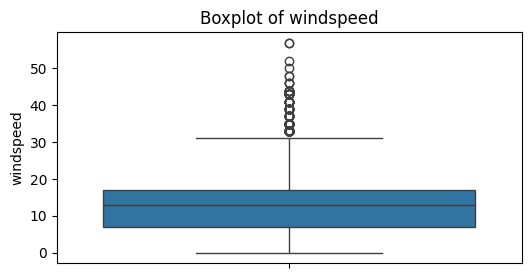

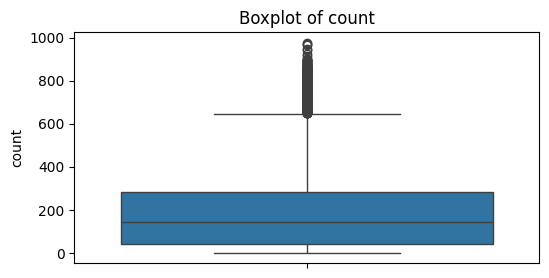

In [ ]:
for col in ['temp', 'humidity', 'windspeed', 'count']:
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
    plt.show()


Insight(TEMPERATURE):

▪ Temperature ranges mostly between 5°C and 35°C.

▪ Median temperature is around 20°C, indicating mild conditions.

▪ Few low-end outliers suggest rare cold days in the dataset.

▪ Most rental activity likely occurs in the comfortable mid-range.

Recommendations(TEMPERATURE):

▪ Focus marketing on days with moderate temperatures (~20–30°C).

▪ Encourage rentals during colder days with warmth-focused promotions.

▪ Avoid aggressive campaigns during weather extremes at both ends.

▪ Use temperature as a key input in rental demand prediction

Insights(HUMIDITY)
Humidity ranges mostly between 30% to 100%.

Median humidity is around 65%.

Few outliers exist below 10% humidity.

Data shows a moderately wide spread.

Recommendations(HUMIDITY)

Plan promotions during moderate humidity days.

Monitor low humidity outliers for data issues.

Avoid campaigns on high humidity days


Insights(windspeed):

▪ Most windspeed values lie below 30 km/h — generally moderate.

▪ Few high outliers suggest rare extreme wind days.

▪ Median windspeed is around 13 km/h — fairly calm.

▪ Wind patterns show a slightly skewed upper range.

▪ Zero windspeed may reflect sensor issues or data gaps.

Recommendations(windspeed):
▪ Schedule maintenance during high-wind or stormy outlier days.

▪ Promote rentals on calm days with moderate wind levels.

▪ Investigate zero wind values for missing or faulty data.

▪ Exclude extreme wind outliers from model training features.

▪ Use windspeed to inform real-time alerts and pricing.

Insights(COUNTS):

▪ Majority of daily rentals lie between ~50 and ~400.

▪ The median rental count is around 150–200.

▪ Many outliers exist above 650, indicating occasional high-demand days.

▪ Rental distribution is right-skewed with a long upper tail.

 Recommendations(COUNTS):

▪ Investigate outlier days to identify what drives high demand.

▪ Use historical peak data to plan fleet readiness and staff.

▪ Promote off-peak days to reduce underutilization and balance usage.

▪ Include rental outliers in campaign success and weather impact analysis.

In [ ]:
Q1 = df['count'].quantile(0.25)
Q3 = df['count'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['count'] < (Q1 - 1.5 * IQR)) | (df['count'] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers in 'count': {outliers.shape[0]}")


Number of outliers in 'count': 300


Hypothesis Test: Working Day vs Rentals (2-Sample T-Test)

 Does being a working day affect bike rental demand?

- **H₀ (Null Hypothesis)**: There is no difference in average rentals between working and non-working days.
- **H₁ (Alternative Hypothesis)**: There is a significant difference in average rentals between working and non-working days.


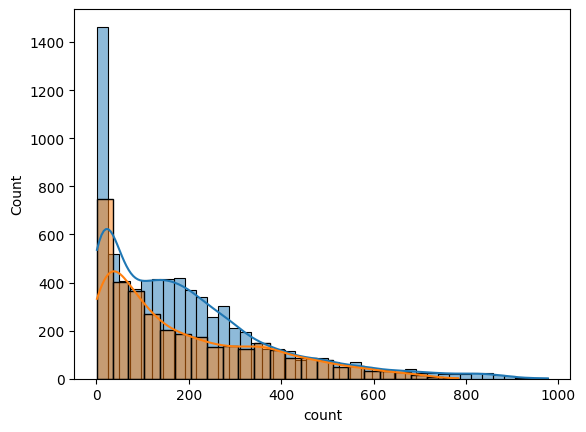

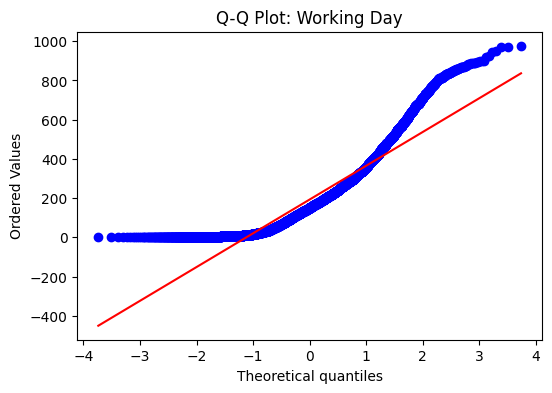

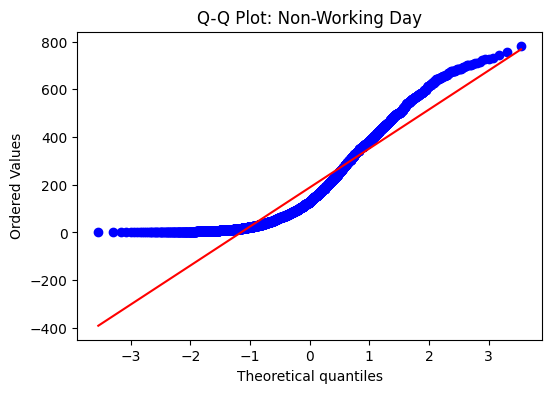

Working Day Skewness: 1.3467224377106803
Working Day Kurtosis: 1.732350506896827
Non-Working Day Skewness: 0.9640377812359698
Non-Working Day Kurtosis: 0.03637652448357587
Levene's p-value: 0.9437823280916695


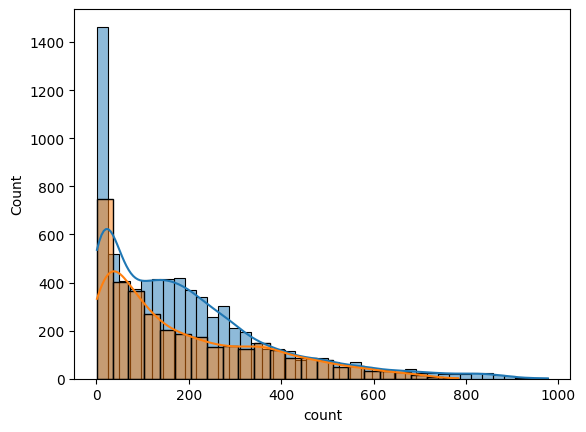

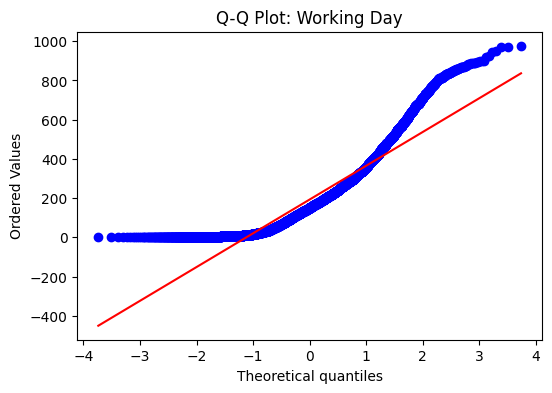

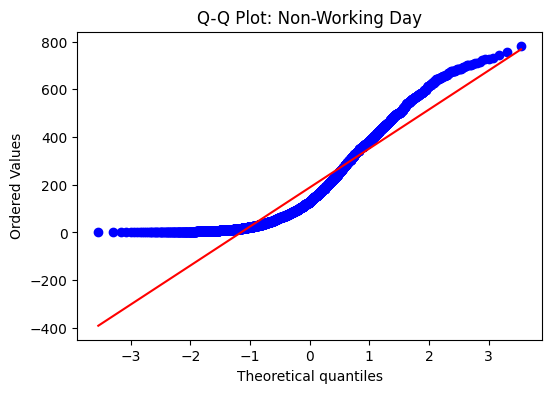

Working Day Skewness: 1.3467224377106803
Working Day Kurtosis: 1.732350506896827
Non-Working Day Skewness: 0.9640377812359698
Non-Working Day Kurtosis: 0.03637652448357587
Levene's p-value: 0.9437823280916695
T-statistic: 1.2096277376026694, p-value: 0.22644804226361348


In [ ]:

sns.histplot(df[df['workingday'] == 1]['count'], kde=True)
sns.histplot(df[df['workingday'] == 0]['count'], kde=True)

import scipy.stats as stats
import matplotlib.pyplot as plt


plt.figure(figsize=(6, 4))
stats.probplot(df[df['workingday'] == 1]['count'], dist="norm", plot=plt)
plt.title("Q-Q Plot: Working Day")
plt.show()


plt.figure(figsize=(6, 4))
stats.probplot(df[df['workingday'] == 0]['count'], dist="norm", plot=plt)
plt.title("Q-Q Plot: Non-Working Day")
plt.show()

print("Working Day Skewness:", df[df['workingday'] == 1]['count'].skew())
print("Working Day Kurtosis:", df[df['workingday'] == 1]['count'].kurt())

print("Non-Working Day Skewness:", df[df['workingday'] == 0]['count'].skew())
print("Non-Working Day Kurtosis:", df[df['workingday'] == 0]['count'].kurt())


stat, p_levene = levene(df[df['workingday'] == 1]['count'],
                        df[df['workingday'] == 0]['count'])
print(f"Levene's p-value: {p_levene}")

t_stat, p_val = ttest_ind(df[df['workingday'] == 1]['count'],
                          df[df['workingday'] == 0]['count'],
                          equal_var=(p_levene > 0.05))

import seaborn as sns
from scipy.stats import levene, ttest_ind
import scipy.stats as stats
import matplotlib.pyplot as plt


sns.histplot(df[df['workingday'] == 1]['count'], kde=True)
sns.histplot(df[df['workingday'] == 0]['count'], kde=True)

plt.figure(figsize=(6, 4))
stats.probplot(df[df['workingday'] == 1]['count'], dist="norm", plot=plt)
plt.title("Q-Q Plot: Working Day")
plt.show()


plt.figure(figsize=(6, 4))
stats.probplot(df[df['workingday'] == 0]['count'], dist="norm", plot=plt)
plt.title("Q-Q Plot: Non-Working Day")
plt.show()

print("Working Day Skewness:", df[df['workingday'] == 1]['count'].skew())
print("Working Day Kurtosis:", df[df['workingday'] == 1]['count'].kurt())

print("Non-Working Day Skewness:", df[df['workingday'] == 0]['count'].skew())
print("Non-Working Day Kurtosis:", df[df['workingday'] == 0]['count'].kurt())


stat, p_levene = levene(df[df['workingday'] == 1]['count'],
                        df[df['workingday'] == 0]['count'])
print(f"Levene's p-value: {p_levene}")

t_stat, p_val = ttest_ind(df[df['workingday'] == 1]['count'],
                          df[df['workingday'] == 0]['count'],
                          equal_var=(p_levene > 0.05))

print(f"T-statistic: {t_stat}, p-value: {p_val}")



 Insight(histogram):
Most rentals are low; distribution is right-skewed. Working days have slightly higher rentals, but variation is high across both types.

 Recommendation(histogram):
Avoid targeting only working days. Promote casual usage equally on non-working days to balance demand and reduce idle inventory risks.



Insights(working days):
Right-skewed distribution: Most rentals are low, with some very high outliers.

Heavy tails: Deviation at both ends suggests non-normal distribution.

Q-Q curve bends upward: Indicates excess high rental values on some working days.

Central points align better: Middle rentals are somewhat consistent with normality.

Data is not normal: Assumption of normality for parametric tests is violated.


Recommendations(working days):
Proceed with t-tests due to large sample size (CLT).

Avoid assumptions of normality in visual or predictive modeling.

Use log transformation if fitting regression models.

Monitor high-demand weekdays to optimize bike allocation.

Identify causes of weekday spikes for targeted campaigns.



Insight

- Data is not normally distributed for both day types.  
- Q-Q plots show strong deviation from normal curve.  
- Right-skewed distribution with many low and few high rentals.  
- High kurtosis indicates presence of outliers.  
- Normality assumption for t-test is violated.

Recommendation

- Use t-test due to large sample size (CLT).  
- Mention normality violation in final interpretation.  
- Apply log transformation for model building.  
- Study outlier days for demand surge insights.  
- Track events linked to high rental spikes.

In [ ]:

spring = df[df['season'] == 1]['count']
summer = df[df['season'] == 2]['count']
fall = df[df['season'] == 3]['count']
winter = df[df['season'] == 4]['count']

for group in [spring, summer, fall, winter]:
    print(shapiro(group.sample(500, random_state=42)))

print("Levene’s Test:", levene(spring, summer, fall, winter))

f_stat, p_anova = f_oneway(spring, summer, fall, winter)
print(f"F-statistic: {f_stat}, p-value: {p_anova}")


ShapiroResult(statistic=np.float64(0.8610648369491145), pvalue=np.float64(1.2137096897978967e-20))
ShapiroResult(statistic=np.float64(0.894413967068355), pvalue=np.float64(4.668666999680628e-18))
ShapiroResult(statistic=np.float64(0.9175356147818557), pvalue=np.float64(6.873975175821174e-16))
ShapiroResult(statistic=np.float64(0.8806076593396468), pvalue=np.float64(3.4270386455092693e-19))
Levene’s Test: LeveneResult(statistic=np.float64(187.7706624026276), pvalue=np.float64(1.0147116860043298e-118))
F-statistic: 236.94671081032106, p-value: 6.164843386499654e-149


F-statistic: 236.95

p-value: 6.16e-149 (i.e., << 0.05)

Shapiro-Wilk p-values for all seasons are < 0.05, indicating non-normal distribution of rental counts across all seasons.

Levene’s Test p-value is also < 0.05, so variances are unequal across groups.

There is a statistically significant difference in bike rentals across seasons.



Insight :

Bike rental demand shows significant seasonal variation, with fall seeing the highest usage, summer also strong, and spring having the lowest rentals due to unpredictable weather and lower user interest.

Recommendation :

Scale up fleet size and visibility during high-demand fall and summer seasons. Run springtime promotions or collaborate with events to stimulate usage and reduce underutilization in low-demand periods.

In [ ]:

contingency = pd.crosstab(df['season'], df['weather'])

chi2_stat, p_chi, dof, expected = chi2_contingency(contingency)
print("Chi-square stat:", chi2_stat)
print("p-value:", p_chi)


Chi-square stat: 49.158655596893624
p-value: 1.549925073686492e-07


Insight:
- Rain and snow are more common in spring/fall.
- Summer and winter see mostly clear weather.

Recommendation:
- Use seasonal weather patterns to optimize fleet availability.
- Schedule maintenance and limit operations in seasons with high chance of rain/snow.
- Send weather-based alerts to users to improve ride planning and safety

In [ ]:
weather_1 = df[df['weather'] == 1]['count']
weather_2 = df[df['weather'] == 2]['count']
weather_3 = df[df['weather'] == 3]['count']
weather_4 = df[df['weather'] == 4]['count']

f_stat_w, p_val_w = f_oneway(weather_1, weather_2, weather_3, weather_4)
print(f"F-statistic: {f_stat_w}, p-value: {p_val_w}")


F-statistic: 65.53024112793271, p-value: 5.482069475935669e-42


Insight :

Bike rentals significantly vary across weather types. Rentals are highest during clear weather and drop drastically during rain, snow, or storms, showing strong weather sensitivity in user behavior.

Recommendation :

Prioritize operations during clear days with marketing boosts. Temporarily suspend or scale down services during poor weather. Use weather forecasts to proactively manage fleet allocation and safety alerts.

In [ ]:
contingency = pd.crosstab(df['season'], df['weather'])
chi2_stat, p_chi, dof, expected = chi2_contingency(contingency)
print(f"Chi-square stat: {chi2_stat}, p-value: {p_chi}")


Chi-square stat: 49.158655596893624, p-value: 1.549925073686492e-07


Insight :

Weather patterns are not evenly distributed across seasons. Clear weather dominates summer and winter, while rain and snow are more frequent in fall and spring, affecting rental availability and safety.

Recommendation :

Use seasonal weather patterns to plan fleet maintenance, adjust service availability, and inform users. Develop weather-based operational strategies and alert systems to optimize safety and customer experience across seasons.

In [ ]:
for w in df['weather'].unique():
    group = df[df['weather'] == w]['count']
    sample_size = min(500, len(group))
    print(f"Shapiro-Wilk Test for weather = {w}")
    print(stats.shapiro(group.sample(sample_size, random_state=42)))
    print()



Shapiro-Wilk Test for weather = 1
ShapiroResult(statistic=np.float64(0.8709383856244287), pvalue=np.float64(6.26244864523398e-20))

Shapiro-Wilk Test for weather = 2
ShapiroResult(statistic=np.float64(0.9005330982723817), pvalue=np.float64(1.6096484425494253e-17))

Shapiro-Wilk Test for weather = 3
ShapiroResult(statistic=np.float64(0.7522313482992631), pvalue=np.float64(1.0549522584707147e-26))

Shapiro-Wilk Test for weather = 4
ShapiroResult(statistic=np.float64(nan), pvalue=np.float64(nan))



Insight

The Shapiro-Wilk test confirms non-normal distribution of rental counts across all weather types. Clear weather shows higher and stable demand, while mist, rain, and snow cause irregular or very low usage. Particularly, heavy weather data is extremely sparse, indicating minimal or suspended operations during such extreme conditions.

Recommendation

Focus marketing and resource allocation on clear-weather days with high, predictable demand. During misty or rainy weather, run soft promotions. Suspend or limit services during heavy weather for safety. Schedule bike maintenance and redistribution during low-demand periods, ensuring availability and readiness when favorable conditions return.

In [ ]:
contingency_table = pd.crosstab(df['season'], df['weather'])
chi2_stat, chi2_p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square Statistic:", chi2_stat)
print("p-value:", chi2_p)
print("Degrees of Freedom:", dof)


Chi-square Statistic: 49.158655596893624
p-value: 1.549925073686492e-07
Degrees of Freedom: 9


Insight:

Season significantly influences weather patterns affecting rental usage trends.

Recommendation :

Plan bike availability and promotions based on seasonal weather trends.

In [ ]:
contingency = pd.crosstab(df['season'], df['weather'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(f"Chi-square statistic: {chi2_stat}, p-value: {p_val}")


Chi-square statistic: 49.158655596893624, p-value: 1.549925073686492e-07


Insight:

Weather patterns significantly differ across seasons, showing strong seasonal dependency.

Recommendation :

Plan bike availability seasonally, prioritizing clear weather in peak months.

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

contingency = pd.crosstab(df['season'], df['weather'])

chi2_stat, p_val, dof, expected = chi2_contingency(contingency)

print("Chi-square statistic:", chi2_stat)
print("Degrees of freedom:", dof)
print("p-value:", p_val)


Chi-square statistic: 49.158655596893624
Degrees of freedom: 9
p-value: 1.549925073686492e-07


 Insight:
Season strongly influences weather patterns; dependency is statistically significant.

Recommendation :

Align operations seasonally, anticipating common weather types in advance.










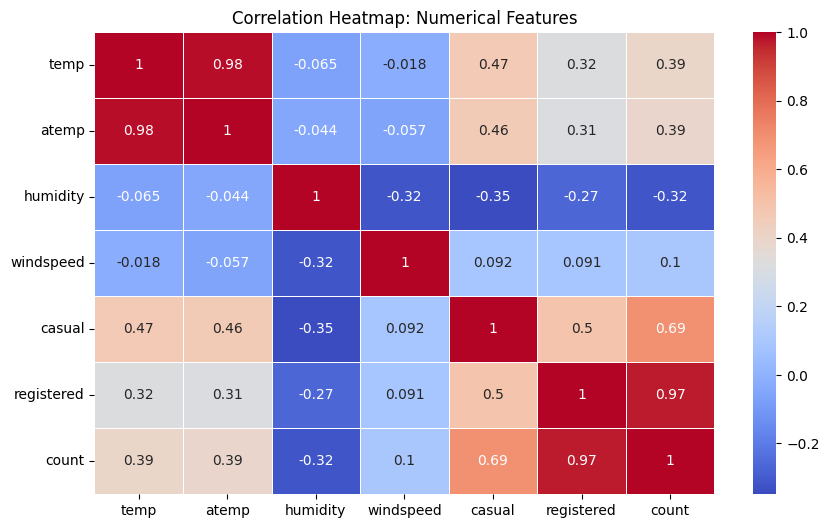

In [ ]:
plt.figure(figsize=(10, 6))
correlation_matrix = df[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap: Numerical Features')
plt.show()


 Correlation Heatmap Insights:

- `registered` users have the highest impact on total bike rentals.
- Casual users contribute moderately but are still an important segment.
- Temperature (both actual and perceived) positively influences rentals.
- Humidity and windspeed negatively affect usage — likely due to discomfort.
- Since `temp` and `atemp` are highly correlated (0.98), we can consider dropping one of them in predictive models to avoid multicollinearity.

Recommendation:
Prioritize engagement of registered users and plan promotions around favorable weather conditions. Use weather features in forecasting demand and consider simplifying models by dropping one of the temperature features.


Final Summary of Hypothesis Testing


| Hypothesis                            | Test Used         | p-value         | Result              | Conclusion                                            |
|---------------------------------------|-------------------|------------------|---------------------|--------------------------------------------------------|
| Working Day vs Rentals                | 2-sample T-test   | 0.226            | p > 0.05            | No significant difference in rentals by day type       |
| Rentals across Seasons                | One-way ANOVA     | 6.16e-149        | p < 0.05            | Rentals significantly differ across seasons            |
| Rentals across Weather Conditions     | One-way ANOVA     | 5.48e-42         | p < 0.05            | Weather has a significant impact on rental demand      |
| Weather dependency on Season          | Chi-Square Test   | 1.55e-07         | p < 0.05            | Weather patterns depend significantly on season        |


Key Recommendations:
- Promote rentals during summer/fall with clear skies.
- Ensure safety alerts during bad weather.
- Optimize bike availability based on seasonal demand trends.
- Use weather forecasts to adjust service dynamically.


Overall Conclusion

This analysis shows that Yulu’s bike rental demand is significantly influenced by both season and weather. Rentals peak during fall and clear-weather days, while adverse weather conditions and extreme seasons like spring reduce usage. Interestingly, there’s no major difference between working and non-working day demand, indicating consistent usage patterns. These insights can help Yulu optimize operations by planning fleet distribution, scheduling maintenance, and tailoring promotions based on seasonal and weather forecasts. Implementing a data-driven approach will enhance efficiency, improve user satisfaction, and boost revenue.
